In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]], columns=['A', 'B', 'C'])
print(df)

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_test.shape   

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
y_train.shape   

(60000,)

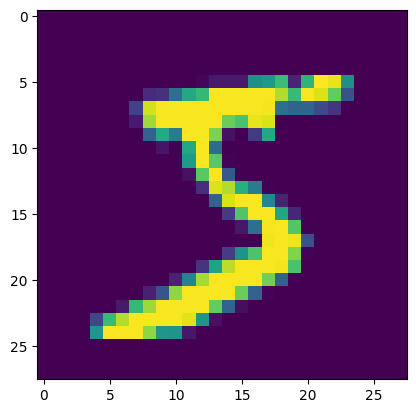

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_split=0.2)

Epoch 1/30
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8799 - loss: 0.3993 - val_accuracy: 0.9592 - val_loss: 0.1345
Epoch 2/30
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 5s 936us/step - accuracy: 0.9677 - loss: 0.1100 - val_accuracy: 0.9672 - val_loss: 0.1148
Epoch 3/30
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 5s 968us/step - accuracy: 0.9764 - loss: 0.0796 - val_accuracy: 0.9695 - val_loss: 0.1071
Epoch 4/30
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 5s 976us/step - accuracy: 0.9814 - loss: 0.0594 - val_accuracy: 0.9704 - val_loss: 0.1082
Epoch 5/30
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 5s 965us/step - accuracy: 0.9855 - loss: 0.0436 - val_accuracy: 0.9718 - val_loss: 0.1092
Epoch 6/30
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 5s 968us/step - accuracy: 0.9889 - loss: 0.0356 - val_accuracy: 0.9727 - val_loss: 0.1094
Epoch 7/30
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 5s 951us/step - accuracy: 0.9898 - loss: 0.0312 - val_accuracy: 0.9730 - val_loss: 0.1054
Epoch 8/30
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 5s 993us/step - accuracy: 0.9913 - l

In [13]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [14]:
y_pred = y_prob.argmax(axis=-1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9788

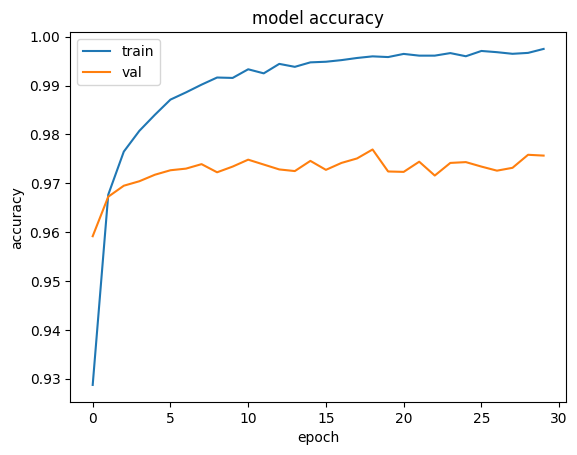

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

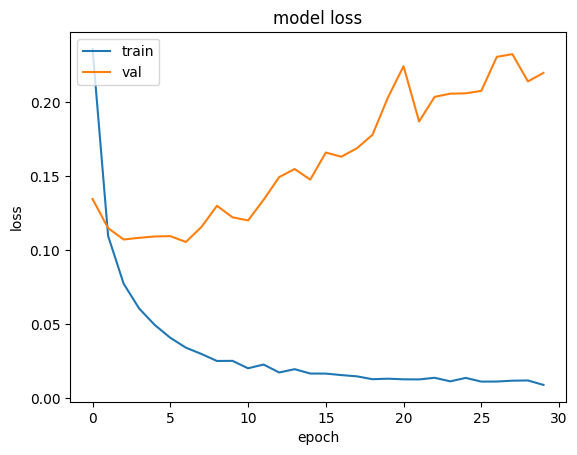

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

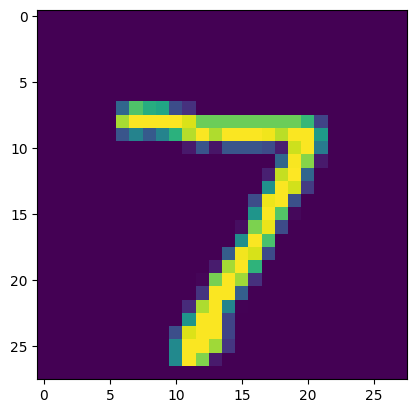

In [18]:
plt.imshow(X_test[0])

In [19]:
model.predict(X_test[0].reshape(1, 28, 28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([7])